In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
# Convert datetime to actual datetime
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday


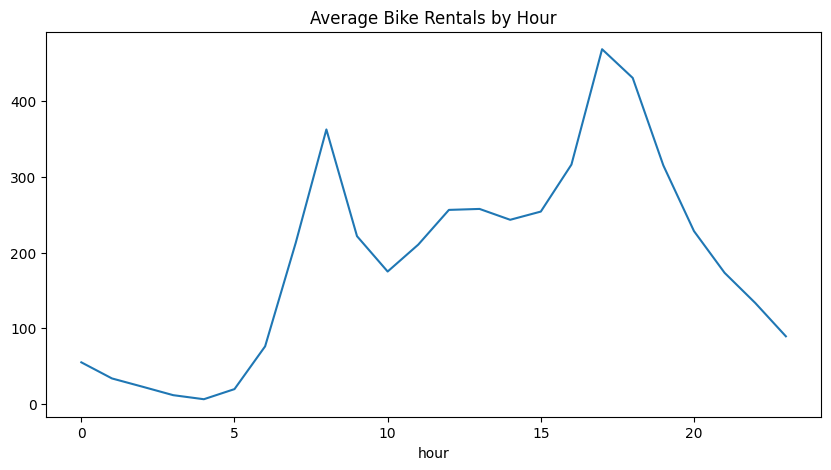

In [3]:
train.groupby('hour')['count'].mean().plot(kind='line', figsize=(10,5))
plt.title("Average Bike Rentals by Hour")
plt.show()


In [6]:
feature_cols = [
    'season', 'holiday', 'workingday', 'weather',
    'temp', 'atemp', 'humidity', 'windspeed',
    'year', 'month', 'day', 'hour', 'weekday'
]

X = train[feature_cols]
y = train['count']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_val)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_dt = mean_absolute_error(y_val, y_pred_dt)
rmse_dt = mean_squared_error(y_val, y_pred_dt) ** 0.5

mae_dt, rmse_dt


(35.07056152667744, 57.9281477738434)

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = mean_squared_error(y_val, y_pred_dt) ** 0.5

mae_rf, rmse_rf


(24.628498057891903, 57.9281477738434)

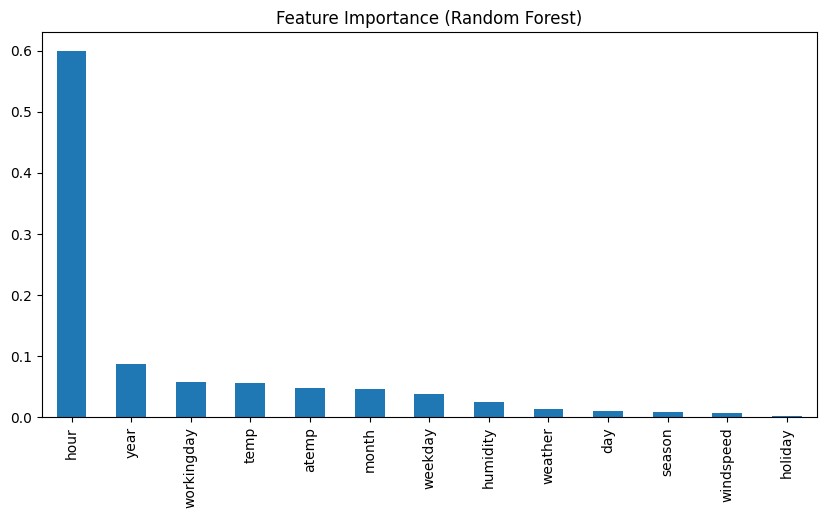

In [11]:
importances = pd.Series(rf.feature_importances_, index=feature_cols)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance (Random Forest)")
plt.show()
